5220411122
MUHAMMAD HASBY MUHARRAMAN

---------------------------------------------pySpark-----------------------------------

In [1]:
!pip install pyspark


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *

In [3]:
# Membuat Spark Session untuk mengakses fungsi-fungsi sparkSQL
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

spark

24/01/05 15:30:21 WARN Utils: Your hostname, codespaces-f75b5f resolves to a loopback address: 127.0.0.1; using 172.16.5.4 instead (on interface eth0)
24/01/05 15:30:21 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/05 15:30:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
dataFrame_student = spark.read.csv('student.csv', header=True, inferSchema=True)
dataFrame_student

Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA
5006,20,Male,State,50%,No,No,Private,2,Always,Yes,No,Yes,Yes,BA
5007,18,Male,State,75%,No,No,Private,0,Always,No,Yes,Yes,Yes,CC
5008,18,Female,State,50%,Yes,Yes,Bus,2,Sometimes,No,Yes,Yes,Yes,BA
5009,19,Female,Other,50%,No,Yes,Bus,0,Always,No,No,No,Yes,CC
5010,21,Female,State,50%,No,No,Bus,12,Never,No,Yes,No,No,Fail


In [5]:
dataFrame_student.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- Student_Age: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- High_School_Type: string (nullable = true)
 |-- Scholarship: string (nullable = true)
 |-- Additional_Work: string (nullable = true)
 |-- Sports_activity: string (nullable = true)
 |-- Transportation: string (nullable = true)
 |-- Weekly_Study_Hours: integer (nullable = true)
 |-- Attendance: string (nullable = true)
 |-- Reading: string (nullable = true)
 |-- Notes: string (nullable = true)
 |-- Listening_in_Class: string (nullable = true)
 |-- Project_work: string (nullable = true)
 |-- Grade: string (nullable = true)



In [6]:
dataFrame_student.columns

['Id',
 'Student_Age',
 'Sex',
 'High_School_Type',
 'Scholarship',
 'Additional_Work',
 'Sports_activity',
 'Transportation',
 'Weekly_Study_Hours',
 'Attendance',
 'Reading',
 'Notes',
 'Listening_in_Class',
 'Project_work',
 'Grade']

In [7]:
dataFrame_student.count()

145

In [8]:
len(dataFrame_student.columns)

15

In [9]:
dataFrame_student.describe().show()

24/01/05 15:30:31 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-----------------+------------------+------+----------------+-----------+---------------+---------------+--------------+------------------+----------+-------+-----+------------------+------------+-----+
|summary|               Id|       Student_Age|   Sex|High_School_Type|Scholarship|Additional_Work|Sports_activity|Transportation|Weekly_Study_Hours|Attendance|Reading|Notes|Listening_in_Class|Project_work|Grade|
+-------+-----------------+------------------+------+----------------+-----------+---------------+---------------+--------------+------------------+----------+-------+-----+------------------+------------+-----+
|  count|              145|               145|   145|             145|        145|            145|            145|           145|               145|       145|    145|  145|               145|         145|  145|
|   mean|           5073.0|19.682758620689654|  NULL|            NULL|       NULL|           NULL|           NULL|          NULL| 2.331034482758621|    

In [10]:

dataFrame_student.select('Id', 'Sex', 'Grade').show()

+----+------+-----+
|  Id|   Sex|Grade|
+----+------+-----+
|5001|  Male|   AA|
|5002|  Male|   AA|
|5003|  Male|   AA|
|5004|Female|   AA|
|5005|  Male|   AA|
|5006|  Male|   BA|
|5007|  Male|   CC|
|5008|Female|   BA|
|5009|Female|   CC|
|5010|Female| Fail|
|5011|Female|   BA|
|5012|Female| Fail|
|5013|Female| Fail|
|5014|Female|   AA|
|5015|  Male|   BA|
|5016|  Male|   BA|
|5017|Female|   AA|
|5018|  Male|   BA|
|5019|Female|   BA|
|5020|  Male|   BB|
+----+------+-----+
only showing top 20 rows



In [11]:
bonus_study_hours = 5
dataFrame_student.withColumn('New_Weekly_Study_Hours', dataFrame_student['Weekly_Study_Hours'] + bonus_study_hours).show()

+----+-----------+------+----------------+-----------+---------------+---------------+--------------+------------------+----------+-------+-----+------------------+------------+-----+----------------------+
|  Id|Student_Age|   Sex|High_School_Type|Scholarship|Additional_Work|Sports_activity|Transportation|Weekly_Study_Hours|Attendance|Reading|Notes|Listening_in_Class|Project_work|Grade|New_Weekly_Study_Hours|
+----+-----------+------+----------------+-----------+---------------+---------------+--------------+------------------+----------+-------+-----+------------------+------------+-----+----------------------+
|5001|         21|  Male|           Other|        50%|            Yes|             No|       Private|                 0|    Always|    Yes|  Yes|                No|          No|   AA|                     5|
|5002|         20|  Male|           Other|        50%|            Yes|             No|       Private|                 0|    Always|    Yes|   No|               Yes|        

In [12]:
dataFrame_student.withColumnRenamed('Sex', 'Gender')

Id,Student_Age,Gender,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA
5006,20,Male,State,50%,No,No,Private,2,Always,Yes,No,Yes,Yes,BA
5007,18,Male,State,75%,No,No,Private,0,Always,No,Yes,Yes,Yes,CC
5008,18,Female,State,50%,Yes,Yes,Bus,2,Sometimes,No,Yes,Yes,Yes,BA
5009,19,Female,Other,50%,No,Yes,Bus,0,Always,No,No,No,Yes,CC
5010,21,Female,State,50%,No,No,Bus,12,Never,No,Yes,No,No,Fail


In [13]:
dataFrame_student.filter(dataFrame_student['Student_Age'] >= 20).show()

+----+-----------+------+----------------+-----------+---------------+---------------+--------------+------------------+----------+-------+-----+------------------+------------+-----+
|  Id|Student_Age|   Sex|High_School_Type|Scholarship|Additional_Work|Sports_activity|Transportation|Weekly_Study_Hours|Attendance|Reading|Notes|Listening_in_Class|Project_work|Grade|
+----+-----------+------+----------------+-----------+---------------+---------------+--------------+------------------+----------+-------+-----+------------------+------------+-----+
|5001|         21|  Male|           Other|        50%|            Yes|             No|       Private|                 0|    Always|    Yes|  Yes|                No|          No|   AA|
|5002|         20|  Male|           Other|        50%|            Yes|             No|       Private|                 0|    Always|    Yes|   No|               Yes|         Yes|   AA|
|5003|         21|  Male|           State|        50%|             No|          

In [14]:
dataFrame_student.filter((dataFrame_student['Id'] > 5005) & (dataFrame_student['Id'] <= 5015)).show()

+----+-----------+------+----------------+-----------+---------------+---------------+--------------+------------------+----------+-------+-----+------------------+------------+-----+
|  Id|Student_Age|   Sex|High_School_Type|Scholarship|Additional_Work|Sports_activity|Transportation|Weekly_Study_Hours|Attendance|Reading|Notes|Listening_in_Class|Project_work|Grade|
+----+-----------+------+----------------+-----------+---------------+---------------+--------------+------------------+----------+-------+-----+------------------+------------+-----+
|5006|         20|  Male|           State|        50%|             No|             No|       Private|                 2|    Always|    Yes|   No|               Yes|         Yes|   BA|
|5007|         18|  Male|           State|        75%|             No|             No|       Private|                 0|    Always|     No|  Yes|               Yes|         Yes|   CC|
|5008|         18|Female|           State|        50%|            Yes|          

In [15]:
from pyspark.sql.functions import *

In [16]:
dataFrame_student.select([count (when (isnan (c), c)).alias (c) for c in dataFrame_student.columns]).show()

+---+-----------+---+----------------+-----------+---------------+---------------+--------------+------------------+----------+-------+-----+------------------+------------+-----+
| Id|Student_Age|Sex|High_School_Type|Scholarship|Additional_Work|Sports_activity|Transportation|Weekly_Study_Hours|Attendance|Reading|Notes|Listening_in_Class|Project_work|Grade|
+---+-----------+---+----------------+-----------+---------------+---------------+--------------+------------------+----------+-------+-----+------------------+------------+-----+
|  0|          0|  0|               0|          0|              0|              0|             0|                 0|         0|      0|    0|                 0|           0|    0|
+---+-----------+---+----------------+-----------+---------------+---------------+--------------+------------------+----------+-------+-----+------------------+------------+-----+



In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

24/01/05 15:30:36 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


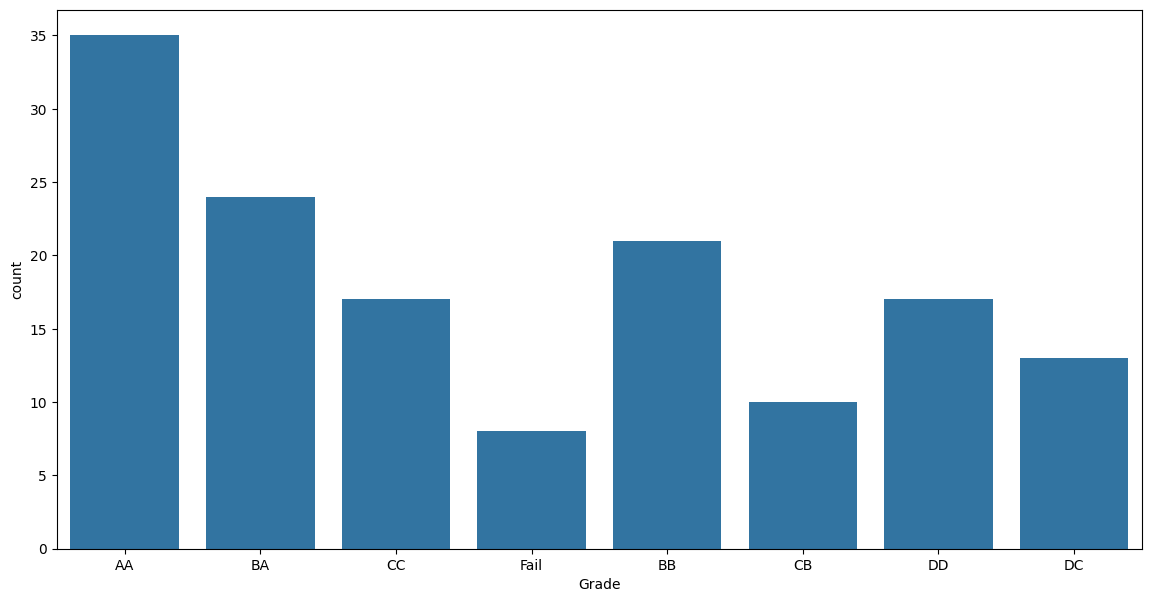

In [18]:
fig = plt.figure(1, figsize=(14,7))
sns.countplot(x="Grade", data=dataFrame_student.toPandas())
plt.show()

=======================================================Newspaper3k=========================================================================

In [19]:
!pip install newspaper3k


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip


In [20]:
from newspaper import Article

In [21]:
url = 'https://id.wikipedia.org/wiki/Halaman_Utama'
article = Article(url, 'id')
article.download()
article.parse()

berita = article.text
print('berita\n', berita)

berita
 Ganimede adalah satelit alami planet Yupiter. Satelit ini merupakan satelit alami terbesar di Tata Surya. Ganymede adalah satelit ketujuh di Tata Surya dan satelit Galileo ketiga dari Yupiter. Satelit ini mengitari planetnya selama tujuh hari dan sebagian besar terdiri dari batu silikat dan es air. Ganymede merupakan benda langit yang berdiferensiasi sepenuhnya dengan inti yang cair, kaya akan besi. Samudra air asin dipercaya ada pada hampir 200 km di bawah permukaan Ganymede, yang diapit lapisan-lapisan es. Permukaannya terdiri dari dua macam bentuk medan permukaan. Daerah gelap, yang penuh akan kawah tubrukan yang berasal dari hingga 4 miliar tahun yang lalu, menutupi sepertiga permukaan satelit itu. Daerah yang lebih terang, yang dilewati oleh alur-alur dan punggung bukit yang besar dan hanya sedikit lebih tua, menutupi sisanya. Penyebab kacaunya geologi medan permukaan terang itu tidak sepenuhnya diketahui, namun mungkin karena aktivitas tektonik yang ditimbulkan oleh peman

In [22]:
!pip install wordcloud


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip


In [23]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [24]:
wc = WordCloud(max_font_size=1000, max_words=10000, background_color="black")
wc.generate(berita)

cmap = ListedColormap(["white"])
wc.recolor(colormap=cmap)

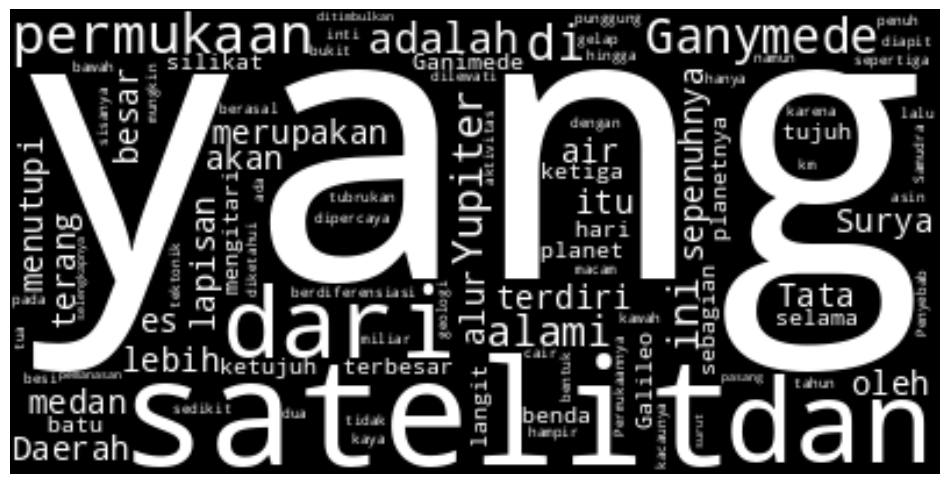

In [25]:
plt.figure(figsize = (12, 15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()